# Análise multivariada

## Preparando o ambiente

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

## Carregando os dados

In [2]:
dataset = pd.read_csv('../data/complete_dataset_region/complete_dataset_region.csv')
dataset.head()

,country,region,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
0,afghanistan,asia,3.723590,7.370100,0.450662,50.799999,0.718114,0.167640,0.881686,0.517637,0.258195,2008
1,afghanistan,asia,4.401778,7.539972,0.552308,51.200001,0.678896,0.190099,0.850035,0.583926,0.237092,2009
2,afghanistan,asia,4.758381,7.646709,0.539075,51.599998,0.600127,0.120590,0.706766,0.618265,0.275324,2010
3,afghanistan,asia,3.831719,7.619532,0.521104,51.919998,0.495901,0.162427,0.731109,0.611387,0.267175,2011
4,afghanistan,asia,3.782938,7.705479,0.520637,52.240002,0.530935,0.236032,0.775620,0.710385,0.267919,2012


## Matriz de correlação

In [3]:
dataset.corr()

,score,gdp,social_support,hle,freedom,generosity,corruption,positive_affect,negative_affect,year
score,1.000000,0.786760,0.710903,0.742423,0.524903,0.171968,-0.423622,0.239372,-0.222461,0.037531
gdp,0.786760,1.000000,0.689782,0.834704,0.362880,-0.013398,-0.339782,0.129011,-0.160629,0.074857
social_support,0.710903,0.689782,1.000000,0.620191,0.412178,0.049919,-0.220744,0.206519,-0.287958,-0.006371
hle,0.742423,0.834704,0.620191,1.000000,0.388563,0.007027,-0.320664,0.097438,-0.137337,0.165953
freedom,0.524903,0.362880,0.412178,0.388563,1.000000,0.305791,-0.472828,0.209498,-0.256278,0.227725
generosity,0.171968,-0.013398,0.049919,0.007027,0.305791,1.000000,-0.278279,0.188454,-0.040181,-0.036023
corruption,-0.423622,-0.339782,-0.220744,-0.320664,-0.472828,-0.278279,1.000000,-0.115570,0.204141,-0.074125
positive_affect,0.239372,0.129011,0.206519,0.097438,0.209498,0.188454,-0.115570,1.000000,0.423639,-0.375988
negative_affect,-0.222461,-0.160629,-0.287958,-0.137337,-0.256278,-0.040181,0.204141,0.423639,1.000000,-0.147286
year,0.037531,0.074857,-0.006371,0.165953,0.227725,-0.036023,-0.074125,-0.375988,-0.147286,1.000000


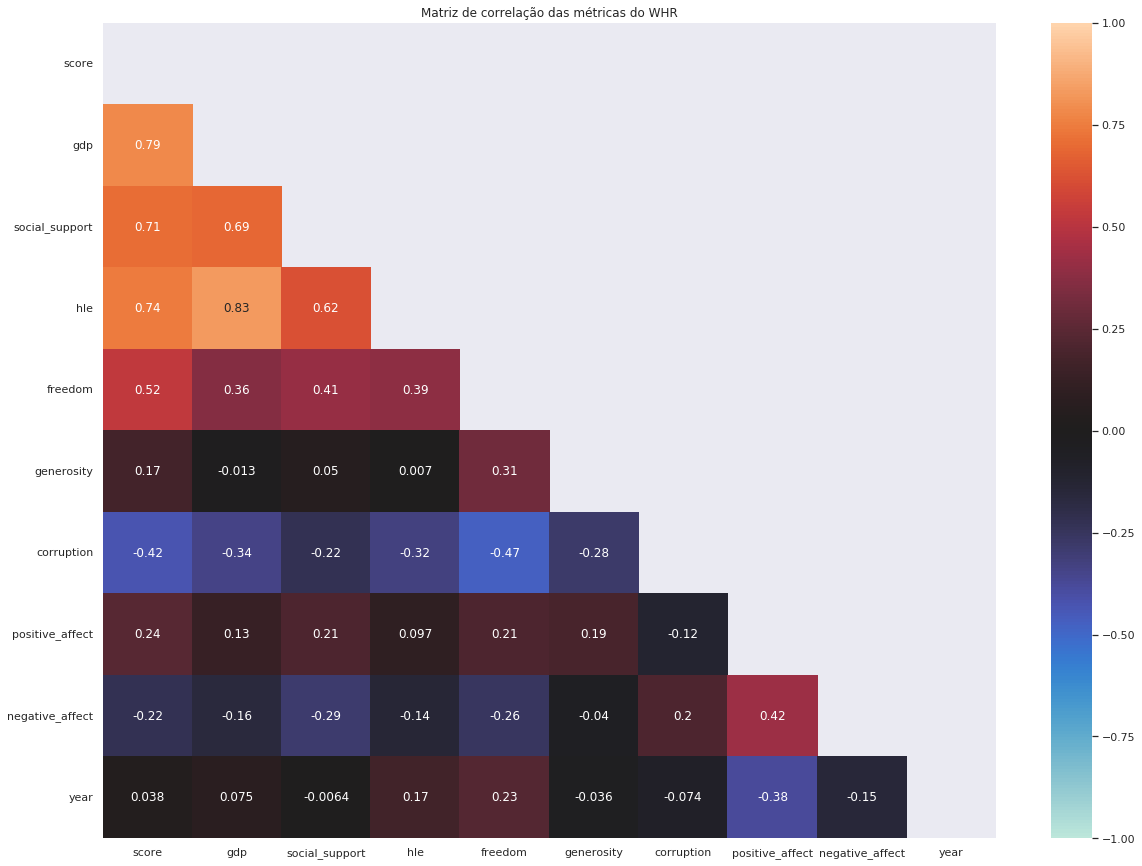

In [4]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(dataset.corr()))
plt.title('Matriz de correlação das métricas do WHR')
plt.show()


* As correlações faze sentido na realidade, expecialmente no score: `positive_affect` tem correlação positiva enquanto `negative_affect` tem correlação negativa.
* GDP tem uma correlação grande com o score, a segunda maior correlação presente nos dados depois da expectativa de vida. Ambas correlações positivas dentro do esperado.
* Não existe nenhuma correlação extremamente positiva ou negativa, o que evita com que variáveis sejam removidas por causa disso. 
* A variável com menor correlação total é o ano.

## Relação entre o score e o número de pesquisas realizadas pelo país

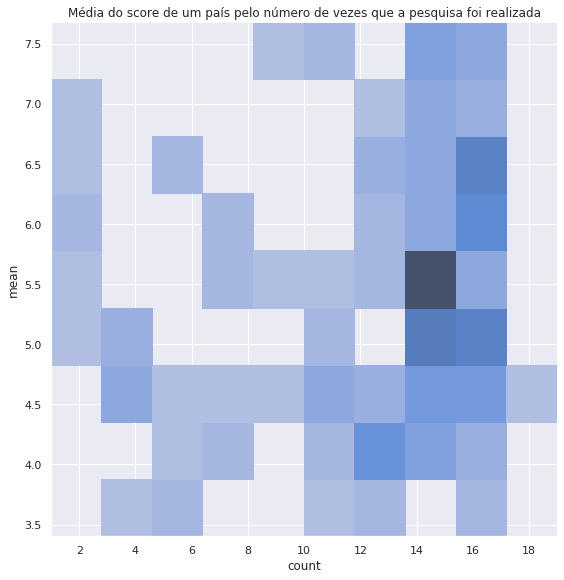

In [5]:
score_by_country_cout = dataset.groupby('country').describe()['score'][['count', 'mean']]

sns.displot(data=score_by_country_cout, x="count", y="mean", height=8)
plt.title('Média do score de um país pelo número de vezes que a pesquisa foi realizada')
plt.show()


Não parece apresentar qualquer relação entre esses dois elementos. Existe correlação?

In [6]:
score_by_country_cout.corr()

,count,mean
count,1.000000,0.171844
mean,0.171844,1.000000


A correlação entre o score e o número de vezes que aparece um país é baixa, praticamente irrelevante.

## Relação entre o score e o número de pesquisas realizadas por região

Parte dessa observação ajuda a verificar bias nos dados de percepção de vida para regiões com mais países.

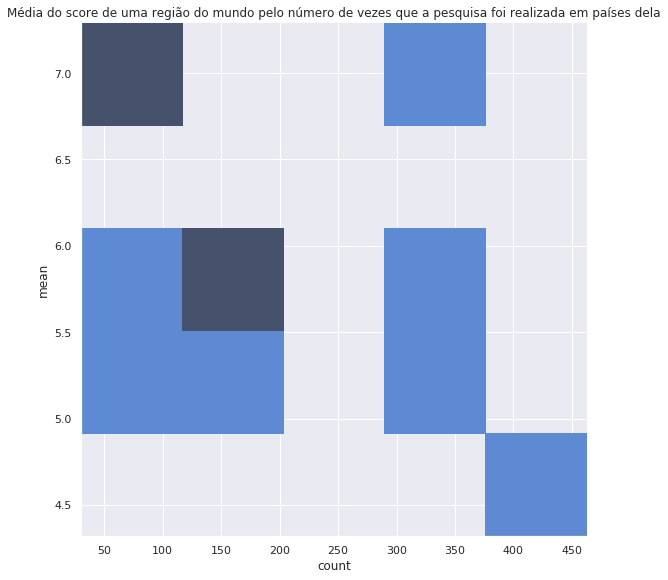

In [7]:
score_by_region_cout = dataset.groupby('region').describe()['score'][['count', 'mean']]

sns.displot(data=score_by_region_cout, x="count", y="mean", height=8)
plt.title('Média do score de uma região do mundo pelo número de vezes que a pesquisa foi realizada em países dela')
plt.show()


In [8]:
score_by_region_cout.corr()

,count,mean
count,1.000000,-0.492023
mean,-0.492023,1.000000


Aqui existe uma correlação negativa mais intensa, que pode indicar bias ou também que os países pesquisados mais vezes tendem a ter índices menores.

## Novos países acrescentados vs países ausentes em relação a pesquisa anterior

In [9]:
first_year = np.min(dataset['year'])
last_year = np.max(dataset['year'])
current_year = first_year + 1
result = []

while(current_year<=last_year):
    countries_before = list(dataset[dataset['year']==current_year-1]['country'].unique())
    countries_current = list(dataset[dataset['year']==current_year]['country'].unique())

    n_added_countries = len(set(countries_current).difference(set(countries_before)))
    n_absent_countries = len(set(countries_before).difference(set(countries_current)))

    result.append({
        'year': current_year,
        'n_added_countries': n_added_countries,
        'n_absent_countries': n_absent_countries
    })

    current_year += 1

result = pd.DataFrame(result)
result


,year,n_added_countries,n_absent_countries
0,2006,86,24
1,2007,40,27
2,2008,26,18
3,2009,27,23
4,2010,20,10
5,2011,23,2
6,2012,9,13
7,2013,6,11
8,2014,13,5
9,2015,7,9


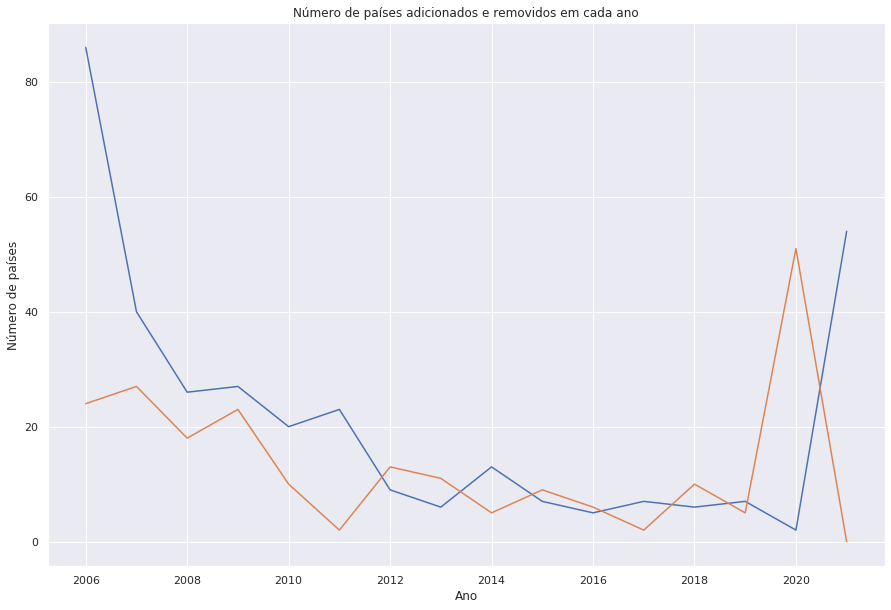

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=result, x='year', y='n_added_countries')
sns.lineplot(data=result, x='year', y='n_absent_countries')
plt.title('Número de países adicionados e removidos em cada ano')
plt.xlabel('Ano')
plt.ylabel('Número de países')
plt.show()

Depois dos primeiros anos, a variação dos países é pequena, exceto pelo ano 2020.

## GDP ao longo do tempo

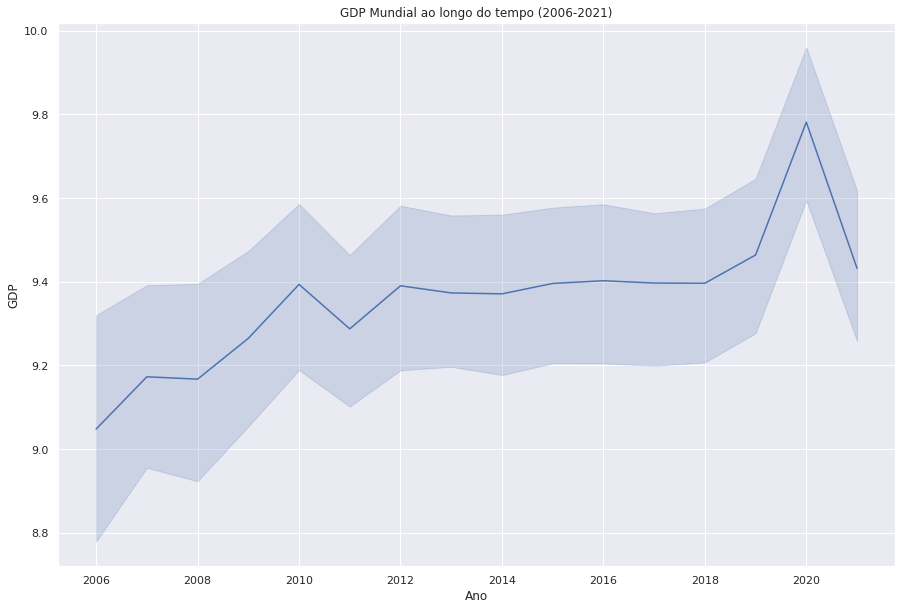

In [11]:
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='gdp')
plt.title('GDP Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('GDP')
plt.show()

Com poucas variações, o GDP mundial se manteve estável entre 2010 e 2019. Antes disso eram poucos países e o ano de 2020 também teve menos países na pesquisa.

**Um dos fatores com maior correlação com o score (o GDP) teve um impacto inverso pela número menor de países na pesquisa. Com isso, relações com a pandemia são complicadas de fazer.**

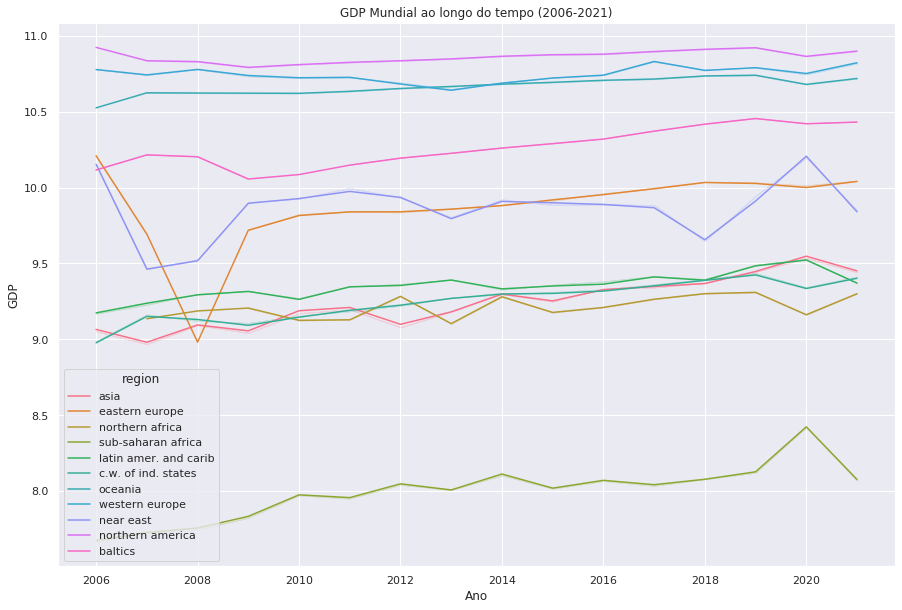

In [12]:
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='gdp', hue='region', ci=0, legend='brief')
plt.title('GDP Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('GDP')
plt.show()

Há uma leve tendência geral de crescimento para as regiões abaixo de 10.5. Por curiosidade como está o Brasil comparado à sua região e com o mundo?

In [13]:
brazil_gdp = dataset[dataset['country']=='brazil'][['year','gdp']]
brazil_gdp['name'] = 'brazil'
lat_america_gdp = dataset[dataset['region']=='latin amer. and carib'].query("country != 'brazil'")[['year','gdp']]
lat_america_gdp['name'] = 'latin america'
brazil_vs_america_gdp = brazil_gdp.append(lat_america_gdp, ignore_index=True)


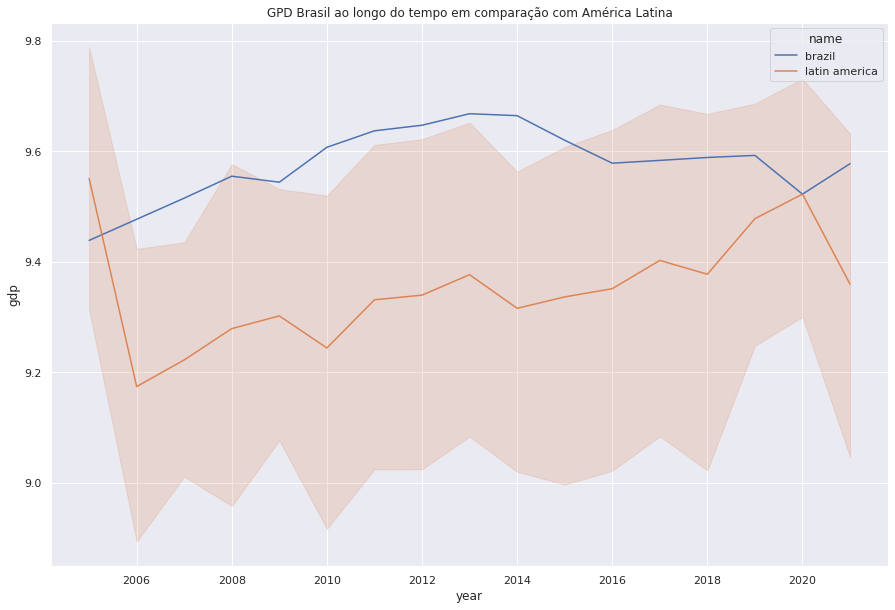

In [14]:
sns.lineplot(data=brazil_vs_america_gdp, x='year', y='gdp', hue='name')
plt.title('GPD Brasil ao longo do tempo em comparação com América Latina')
plt.show()

## O papel do social support

1. Relação entre social_support e score


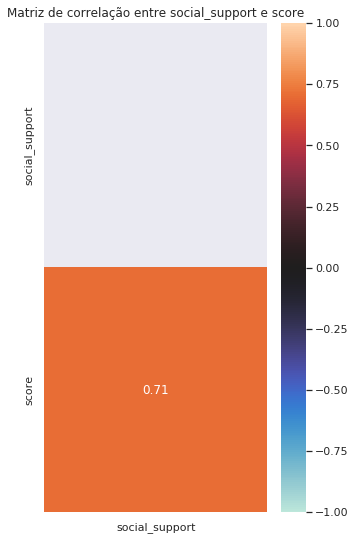

In [15]:
df = pd.DataFrame(dataset, columns=['social_support', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})
sns.heatmap(df.corr()[['social_support']].sort_values(by=['social_support'], ascending=False), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(df.corr()[['social_support']].sort_values(by=['social_support'], ascending=False)))

plt.title('Matriz de correlação entre social_support e score')
plt.show()

Há uma tendência de correlação entre os dois atributos. Já que a segurança de ter alguém que irá apoiar em caso de necessidade possa vir ser um fator positivo.

2. Relação entre social_support e região do mundo

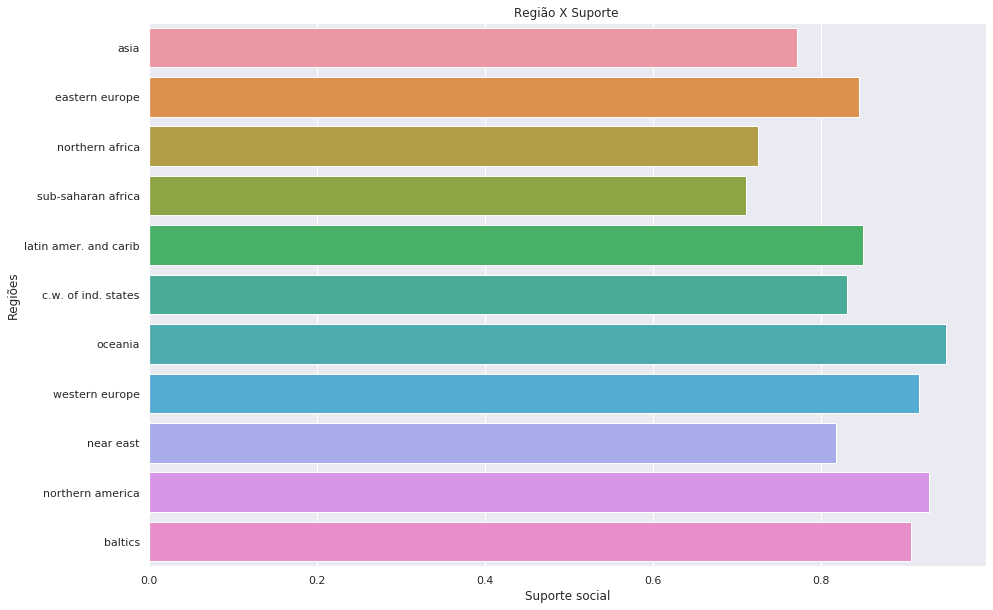

In [16]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.barplot(x="social_support", y="region", data=dataset, ci = None)
plt.title('Região X Suporte ')
plt.ylabel('Regiões')
plt.xlabel('Suporte social')
plt.show()



Mais da metade das regiões acreditam que tem pessoas com que possam contar em caso de necessidade

3. Social_support (total e por região) ao longo do tempo

Mundial

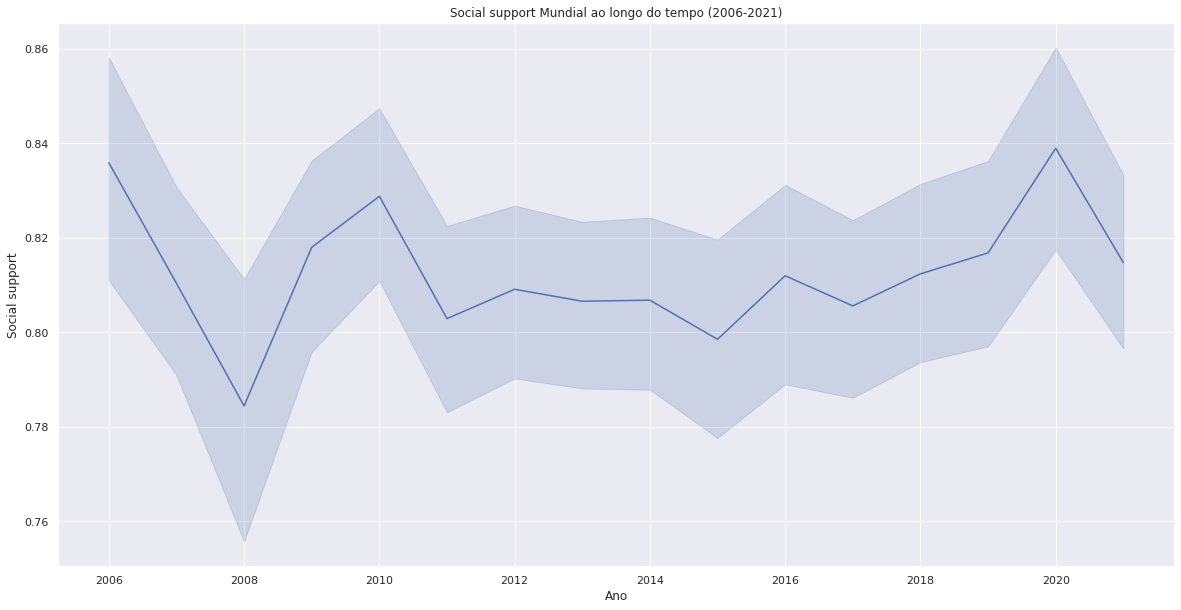

In [17]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='social_support')
plt.title('Social support Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Social support')
plt.show()

Há pouca ocilação ao longo do ano, tendo rompido a minima apenas em 2008 (possivelmente pela crise de 2008) e 2015.

Por região

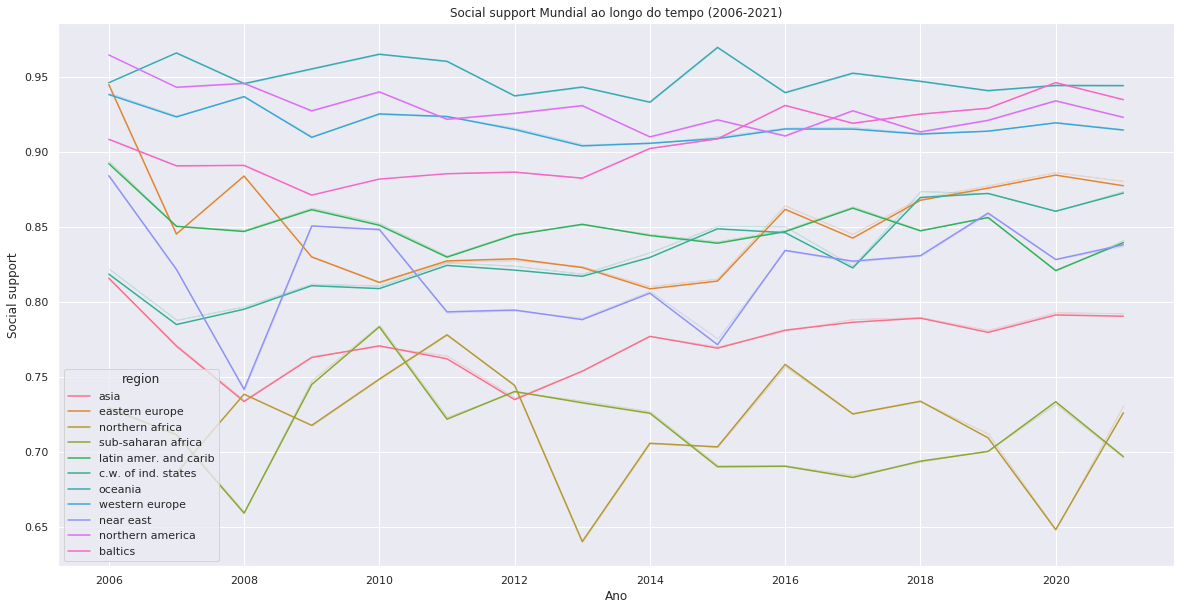

In [18]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='social_support', hue='region', ci=0, legend='brief')
plt.title('Social support Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Social support')
plt.show()

## HLE (healthy life expectancy)

* Relação entre hle e score

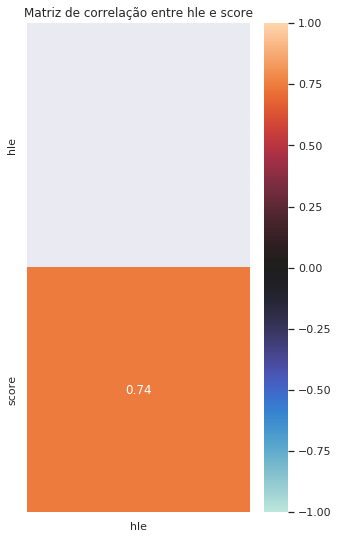

In [19]:
df = pd.DataFrame(dataset, columns=['hle', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})
sns.heatmap(df.corr()[['hle']].sort_values(by=['hle'], ascending=False), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(df.corr()[['hle']].sort_values(by=['hle'], ascending=False)))

plt.title('Matriz de correlação entre hle e score')
plt.show()

Parece apresentar uma relação positiva entre esses dois elementos indicando a possibilidade de uma expectativa maior de vida aumentar o score

* Relação entre hle e região do mundo


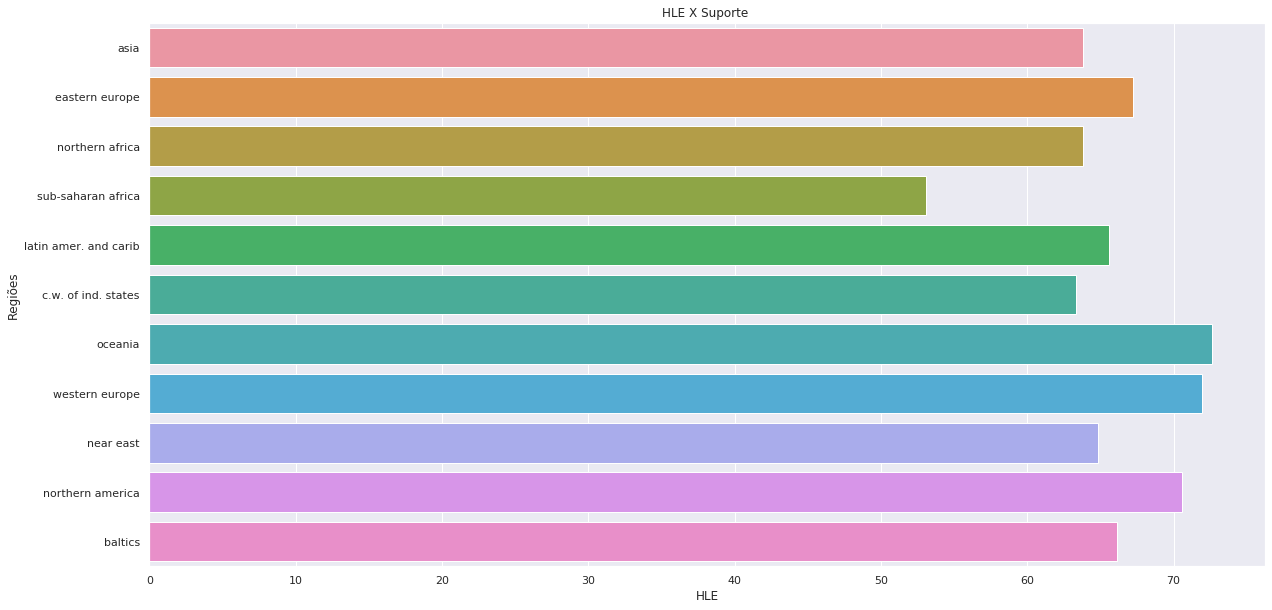

In [20]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="hle", y="region", data=dataset, ci = None)
plt.title('HLE X Suporte ')
plt.ylabel('Regiões')
plt.xlabel('HLE')
plt.show()


Regiões com mais poder aquisitivo parece ter uma vantagem perante os mais sub-desenvolvidos.

* hle (total e por região) ao longo do tempo

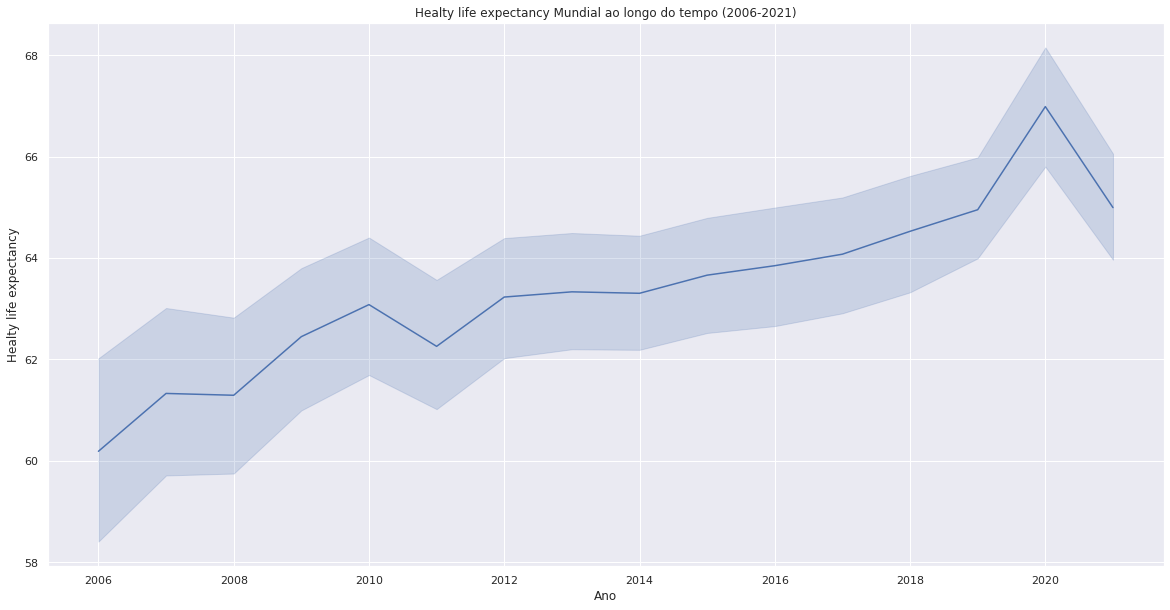

In [21]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='hle')

plt.title('Healty life expectancy Mundial ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Healty life expectancy')
plt.show()

A linha de tendência de alta pode ser representada pelo avanço na medicina, acesso a medicações e exercicios regulares virem a se tornar populares nas classes mais baixas

## FREEDOM

* Relação entre freedom e score

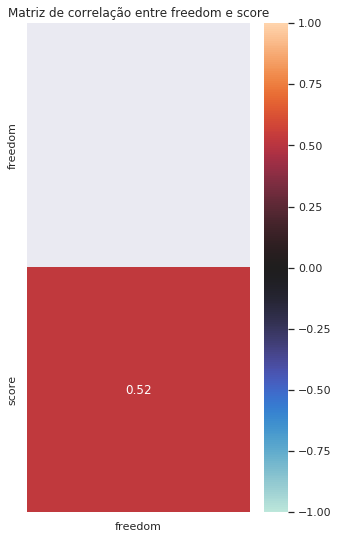

In [22]:
df = pd.DataFrame(dataset, columns=['freedom', 'score'])

sns.set(rc={"figure.figsize":(5, 9)})
sns.heatmap(df.corr()[['freedom']].sort_values(by=['freedom'], ascending=False), annot=True, vmin=-1, vmax=1, center=0, mask=np.triu(df.corr()[['freedom']].sort_values(by=['freedom'], ascending=False)))

plt.title('Matriz de correlação entre freedom e score')
plt.show()


Liberdade tem um alto impacto no atributo positive_affect, o que pode fazer com que o score baixe

* Relação entre freedom e região do mundo

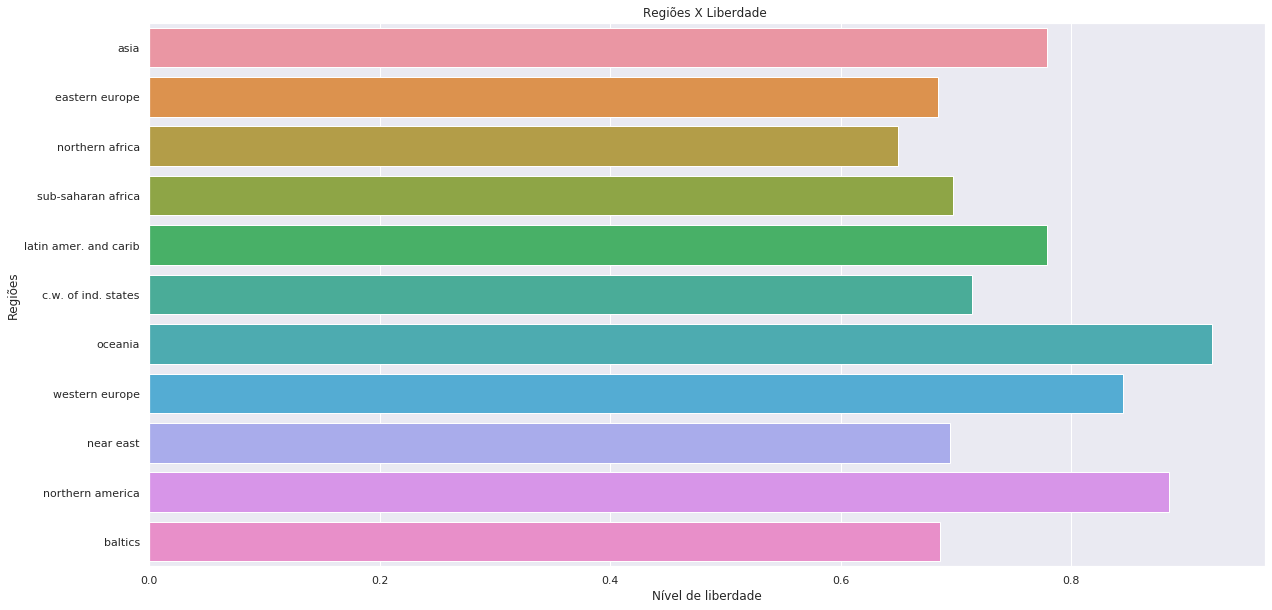

In [25]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.barplot(x="freedom", y="region", data=dataset, ci = None)
plt.title('Regiões X Liberdade ')
plt.ylabel('Regiões')
plt.xlabel('Nível de liberdade')
plt.show()


O nivel de liberdade independentemente da região, tem um valor satisfatório, sendo apenas regiões consideradas "mais democraticas" rompendo a pontuação de 0.8

* freedom (total e por região) ao longo do tempo

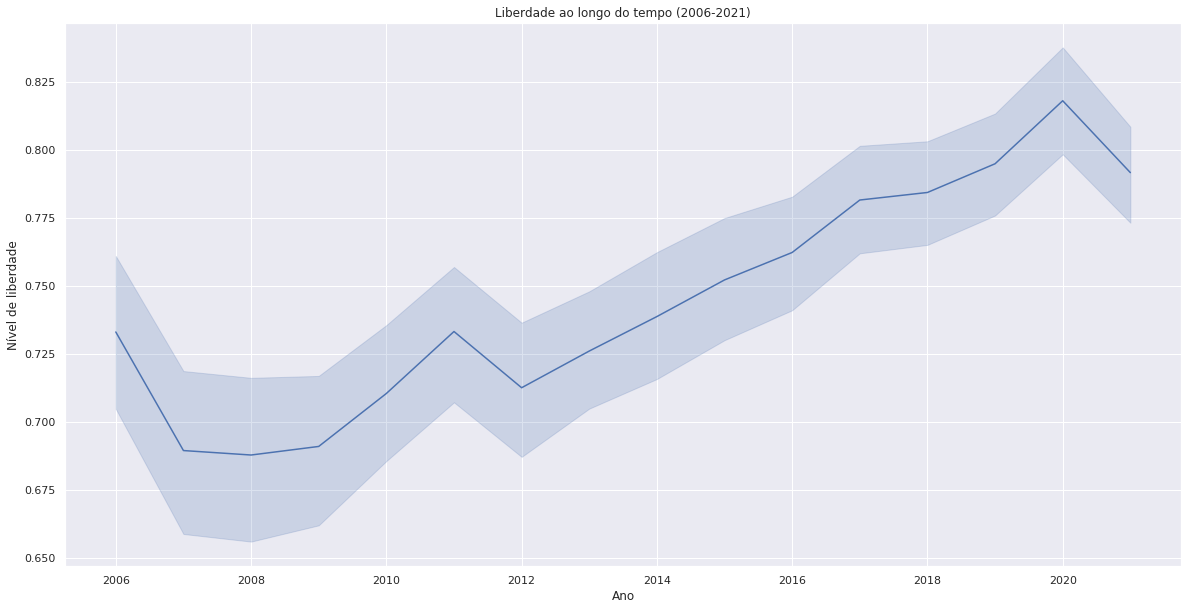

In [26]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data=dataset[dataset['year']>2005], x='year', y='freedom')

plt.title('Liberdade ao longo do tempo (2006-2021)')
plt.xlabel('Ano')
plt.ylabel('Nível de liberdade')
plt.show()

Parece que a a pontuação de liberdade cai quando há crises econômicas como em 2008 e 2012. Além de 2021 com a pandemia